In [63]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import query2igraph as q2i
import plotgraph as pg

import importlib
importlib.reload(pg);

In [18]:
path = "../packages/issi_data_package/output_files/data/"
queryID = "774e7eb6-6ac7-4dd5-9339-531b746cb8ec"

graph = q2i.query2igraph(queryID,path=path)

print("Number of vertices: %d"%graph.vcount())
print("Number of edges: %d"%graph.ecount())
print("Average degree: %.2f"%(graph.ecount()/graph.vcount()))

Number of vertices: 6852
Number of edges: 36704
Average degree: 5.36


In [23]:
print(graph.vertex_attributes())

['paper_id', 'author_id', 'author_sequence_number', 'authors_display_name', 'authors_last_known_affiliation_id', 'journal_id', 'conference_series_id', 'conference_instance_id', 'paper_reference_id', 'field_of_study_id', 'doi', 'doc_type', 'paper_title', 'original_title', 'book_title', 'year', 'date', 'paper_publisher', 'issue', 'paper_abstract', 'paper_first_page', 'paper_last_page', 'paper_reference_count', 'paper_citation_count', 'paper_estimated_citation', 'conference_display_name', 'journal_display_name', 'journal_issn', 'journal_publisher']


In [34]:
# Calculating KCore and getting year
graph.vs["KCore"] = graph.shell_index(mode="IN")
graph.vs["year"] = [int(s[0:4]) for s in graph.vs["date"]]

print("Data from %d to %d"%(min(graph.vs["year"]),max(graph.vs["year"])))

Data from 1976 to 2019


In [42]:
# Obtaining giant weakly connected component
giant = graph.clusters(mode="WEAK").giant()

print("In the giant component:")
print("\tNumber of vertices: %d"%giant.vcount())
print("\tNumber of edges: %d"%giant.ecount())
print("\tAverage degree: %.2f"%(giant.ecount()/giant.vcount()))

In the giant component:
	Number of vertices: 6072
	Number of edges: 36687
	Average degree: 6.04


In [57]:
# Obtaining communities
giantCopy = giant.copy()
giantCopy.to_undirected() #Using Louvain, so the network needs to be undirected
giant.vs["Community"] = [str(c) for c in giantCopy.community_multilevel().membership]
print("Number of communities: %d"%len(set(giant.vs["Community"])))

Number of communities: 18


In [61]:
# Filter graph by year and KCore

minYear = 2000
minKCore = 1

filteredGraph = giant.copy()

beforeMinYear = np.array(filteredGraph.vs["year"])<minYear
lessThanMinKCore = np.array(filteredGraph.vs["KCore"])<minKCore

verticesToDelete = np.where(np.logical_or(beforeMinYear,lessThanMinKCore))[0]
filteredGraph.delete_vertices(verticesToDelete)
filteredGraph = filteredGraph.clusters(mode="WEAK").giant() #gets the major component again just in case

print("Filtered graph:")
print("\tNumber of vertices: %d"%filteredGraph.vcount())
print("\tNumber of edges: %d"%filteredGraph.ecount())
print("\tAverage degree: %.2f"%(filteredGraph.ecount()/filteredGraph.vcount()))

Filtered graph:
	Number of vertices: 1780
	Number of edges: 8824
	Average degree: 4.96


1780
Layouting...
Plotting...
Finished Plotting...


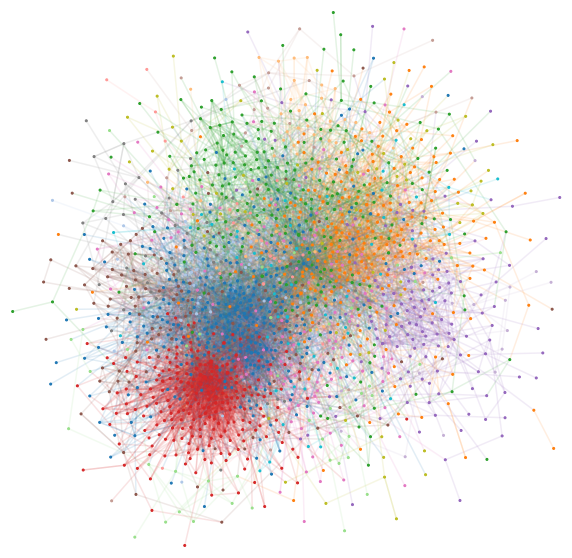

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
pg.drawGraph(filteredGraph,ax)
plt.axis("off")
plt.show()